In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [40]:
dataframe = pd.read_csv("/content/drive/MyDrive/TwitterData.csv")

In [41]:
dataframe.sample(10)

,Unnamed: 0.1,Unnamed: 0,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery
854,854,854,Charlie,@_scharlie22,0.0,1.0,https://twitter.com/_scharlie22/status/1725559...,https://twitter.com//_scharlie22,"That’s a completely false statement, global wa...",2023-11-17T16:58:00.000Z,global warming
642,642,642,Mongobongo,@mongobongo12345,0.0,0.0,https://twitter.com/mongobongo12345/status/172...,https://twitter.com//mongobongo12345,Sure let’s destroy our economy and our country...,2023-11-17T18:43:00.000Z,global warming
1244,1244,1244,Charlie is scared of global warming,@YcaroSUCKS,0.0,1.0,https://twitter.com/YcaroSUCKS/status/17255109...,https://twitter.com//YcaroSUCKS,nunca mais me recuperei desse desenho que fiz,2023-11-17T13:47:00.000Z,global warming
787,787,787,j nova,@jnova_mp3,1.0,11.0,https://twitter.com/jnova_mp3/status/172556692...,https://twitter.com//jnova_mp3,70 degrees in november shoutout global warming,2023-11-17T17:29:00.000Z,global warming
900,900,900,Robert Pujol i Vives,@rpujolvives,0.0,0.0,https://twitter.com/rpujolvives/status/1725552...,https://twitter.com//rpujolvives,World is collapsing due to #climatechange rpuj...,2023-11-17T16:31:00.000Z,global warming
943,943,943,Billy Bishop,@TopAlliedAceWW1,0.0,1.0,https://twitter.com/TopAlliedAceWW1/status/172...,https://twitter.com//TopAlliedAceWW1,Watch the doc Great Global Warming Swindle. In...,2023-11-17T16:12:00.000Z,global warming
1704,1704,84,Construction Buzz,@ConstructionBz,NaN,NaN,https://twitter.com/ConstructionBz/status/1689...,https://twitter.com/ConstructionBz,"A cement works has plans to pipe 800,000 tonne...",2023-08-10T12:00:06.000Z,Carbon emission
1607,1607,44,Pendulumedu,@pendulumedu,NaN,2.0,https://twitter.com/pendulumedu/status/1725471...,https://twitter.com/pendulumedu,Read Daily Current Affairs of 17 November 2023...,2023-11-17T11:11:12.000Z,Green house gases
1504,1504,1504,Paul Michael Stennett,@Stennett1983,0.0,0.0,https://twitter.com/Stennett1983/status/172545...,https://twitter.com//Stennett1983,No even if you can have what you want desire s...,2023-11-17T10:21:00.000Z,global warming
1137,1137,1137,Sky Captain,@skycapta,0.0,0.0,https://twitter.com/skycapta/status/1725523255...,https://twitter.com//skycapta,"Me: The abstract does clearly state: ""much too...",2023-11-17T14:36:00.000Z,global warming


In [42]:
columns_to_delete = [0,1]
dataframe.drop(dataframe.columns[columns_to_delete], axis=1, inplace=True)
dataframe.head()

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming


In [43]:
print("Number of tweets: {}".format(len(dataframe)))

Number of tweets: 1783


In [44]:
dataframe['Post Body'] = dataframe['Post Body'].astype(str)

DATA CLEANING

1.Replace RT with default values

In [45]:
# Define the replace_retweet function
def replace_rt(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

# Apply the replace_retweet function to the "Post Body" column
dataframe['Clean text'] = dataframe['Post Body'].apply(replace_rt)

# DataFrame after cleaning
print("\nDataFrame after removing 'RT' from 'Post Body' column:")
dataframe.head(10)


DataFrame after removing 'RT' from 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,GLOBAL WARMING is waiting for no one. Surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,Yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""There is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"NEW INVESTIGATION\n\nWe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,Environment secretary Steve Barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,IREDA IPO: “We Are India’s Largest Pure-Play G...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,Here's the armchair expert who has solved glob...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,Reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,But I thought it was white supremacy. Wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,Reason for global warming


2.Replace @Someone with Default User Tag



In [46]:
def user_replace(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [47]:
dataframe['Clean text'] = dataframe['Clean text'].apply(user_replace)
print("\nDataFrame after replacing '@' mentions in 'Post Body' column:")
dataframe.head(10)


DataFrame after replacing '@' mentions in 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,GLOBAL WARMING is waiting for no one. Surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,Yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""There is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"NEW INVESTIGATION\n\nWe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,Environment secretary Steve Barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,IREDA IPO: “We Are India’s Largest Pure-Play G...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,Here's the armchair expert who has solved glob...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,Reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,But I thought it was white supremacy. Wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,Reason for global warming


In [48]:
#output an example data set to check if it works
dataframe.loc[1262]

Name                                                    Jeetendra
Handle                                             @arknumbernine
Retweets                                                      0.0
Likes                                                         0.0
Tweet URL       https://twitter.com/arknumbernine/status/17255...
Profile Link                   https://twitter.com//arknumbernine
Post Body       @narendramodi Sir, I kindly request you to, re...
Timestamp                                2023-11-17T13:36:00.000Z
searchQuery                                        global warming
Clean text      twitteruser Sir, I kindly request you to, requ...
Name: 1262, dtype: object

3.Replace Emojis with Meaningful Text

In [31]:
pip install emoji

In [32]:
import emoji

In [33]:
def delemoji(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [34]:
dataframe['Clean text'] = dataframe['Clean text'].apply(delemoji)
print("\nDataFrame after demojizing 'Post Body' column:")
dataframe.head()


DataFrame after demojizing 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,GLOBAL WARMING is waiting for no one. Surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,Yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""There is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"NEW INVESTIGATION\n\nWe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,Environment secretary Steve Barclay received d...


4.Replace Occurrences of http:// or https:// with Default Value

In [35]:
def url_replace(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [36]:
dataframe['Clean text'] = dataframe['Clean text'].apply(url_replace)
print("\nDataFrame after removing URL 'Post Body' column:")
dataframe.head()


DataFrame after removing URL 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,GLOBAL WARMING is waiting for no one. Surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,Yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""There is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"NEW INVESTIGATION\n\nWe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,Environment secretary Steve Barclay received d...


5.Replace Occurrences of # something with Default Value



In [37]:
def hashtag_replace(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [38]:
dataframe['Clean text'] = dataframe['Clean text'].apply(hashtag_replace)
print("\nDataFrame after removing replacing Hashtags 'Post Body' column:")
dataframe.head(10)



DataFrame after removing replacing Hashtags 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,GLOBAL WARMING is waiting for no one. Surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,Yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""There is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"NEW INVESTIGATION\n\nWe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,Environment secretary Steve Barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,IREDA IPO: “We Are India’s Largest Pure-Play G...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,Here's the armchair expert who has solved glob...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,Reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,But I thought it was white supremacy. Wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,Reason for global warming


In [49]:
#output an example data set to check if it works
dataframe.iloc[280]


Name                                                       Mishko
Handle                                                  @Mishko_S
Retweets                                                      0.0
Likes                                                         0.0
Tweet URL       https://twitter.com/Mishko_S/status/1725640259...
Profile Link                        https://twitter.com//Mishko_S
Post Body       #globalwarming #cringe \npiped.video/asfwADW1x...
Timestamp                                2023-11-17T22:21:00.000Z
searchQuery                                        global warming
Clean text      #globalwarming #cringe \npiped.video/asfwADW1x...
Name: 280, dtype: object

6.Lower Case Each Letter

In [50]:
def to_lower(tweet):
  tweet = tweet.lower()
  return tweet

In [51]:
dataframe['Clean text'] = dataframe['Clean text'].apply(to_lower)
print("\nDataFrame after removing replacing to lower case 'Post Body' column:")
dataframe.head(10)


DataFrame after removing replacing to lower case 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,global warming is waiting for no one. surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""there is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"new investigation\n\nwe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,environment secretary steve barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,ireda ipo: “we are india’s largest pure-play g...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,here's the armchair expert who has solved glob...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,but i thought it was white supremacy. wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,reason for global warming


7.Replace Word Repetition

In [52]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [53]:
dataframe['Clean text'] = dataframe['Clean text'].apply(word_repetition)
print("\nDataFrame after reducing word reputition 'Post Body' column:")
dataframe.head(10)


DataFrame after reducing word reputition 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,global warming is waiting for no one. surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""there is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"new investigation\n\nwe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,environment secretary steve barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,ireda ipo: “we are india’s largest pure-play g...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,here's the armchair expert who has solved glob...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,but i thought it was white supremacy. wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,reason for global warming


8.Replace Punctuation Repetition

In [54]:
def punc_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet


In [55]:
dataframe['Clean text'] = dataframe['Clean text'].apply(punc_repetition)
print("\nDataFrame after reducing punct reputition 'Post Body' column:")
dataframe.head(10)


DataFrame after reducing punct reputition 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,global warming is waiting for no one. surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""there is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"new investigation\n\nwe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,environment secretary steve barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,ireda ipo: “we are india’s largest pure-play g...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,here's the armchair expert who has solved glob...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,but i thought it was white supremacy. wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,reason for global warming


In [56]:
#output an example data set to check if it works
dataframe.iloc[600]

Name                                                             
Handle                                                 @ihujan123
Retweets                                                      0.0
Likes                                                         0.0
Tweet URL       https://twitter.com/ihujan123/status/172559295...
Profile Link                       https://twitter.com//ihujan123
Post Body       And for that you're a walking L!! I'm pro glob...
Timestamp                                2023-11-17T19:13:00.000Z
searchQuery                                        global warming
Clean text      and for that you're a walking l! i'm pro globa...
Name: 600, dtype: object

9.Word Contraction

In [57]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.5 MB/s eta 0:00:00


In [58]:
import contractions

In [59]:
def word_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet


In [60]:
dataframe['Clean text'] = dataframe['Clean text'].apply(word_contractions)
print("\nDataFrame after fixing contraction 'Post Body' column:")
dataframe.head(10)


DataFrame after fixing contraction 'Post Body' column:


,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,global warming is waiting for no one. surely w...
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,yet more confirmation that climate change is h...
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""there is increasing evidence that global warm..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"new investigation\n\nwe can reveal that, just..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,environment secretary steve barclay received d...
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,ireda ipo: “we are india’s largest pure-play g...
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,here is the armchair expert who has solved glo...
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,reason behind global warming
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,but i thought it was white supremacy. wait no ...
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,reason for global warming


In [61]:
#output an example data set to check if it works
dataframe.iloc[600]

Name                                                             
Handle                                                 @ihujan123
Retweets                                                      0.0
Likes                                                         0.0
Tweet URL       https://twitter.com/ihujan123/status/172559295...
Profile Link                       https://twitter.com//ihujan123
Post Body       And for that you're a walking L!! I'm pro glob...
Timestamp                                2023-11-17T19:13:00.000Z
searchQuery                                        global warming
Clean text      and for that you are a walking l! i am pro glo...
Name: 600, dtype: object

Classify the polarity as positive, negative, or neutral

In [62]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# Apply the analyze_sentiment function to the 'Clean text' column
dataframe['sentiment'] = dataframe['Clean text'].apply(analyze_sentiment)

In [63]:
dataframe["tweet_sentiment"] = dataframe["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
dataframe.head(10)

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text,sentiment,tweet_sentiment
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18T00:53:00.000Z,global warming,global warming is waiting for no one. surely w...,positive,1
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17T12:04:00.000Z,global warming,yet more confirmation that climate change is h...,positive,1
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14T16:35:00.000Z,global warming,"""there is increasing evidence that global warm...",positive,1
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17T14:23:00.000Z,global warming,"new investigation\n\nwe can reveal that, just...",positive,1
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17T21:15:00.000Z,global warming,environment secretary steve barclay received d...,negative,0
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18T00:55:00.000Z,global warming,ireda ipo: “we are india’s largest pure-play g...,positive,1
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18T00:51:00.000Z,global warming,here is the armchair expert who has solved glo...,positive,1
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18T00:51:00.000Z,global warming,reason behind global warming,negative,0
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18T00:51:00.000Z,global warming,but i thought it was white supremacy. wait no ...,negative,0
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18T00:53:00.000Z,global warming,reason for global warming,negative,0


Extracting Insights: Unveiling Trends and Patterns

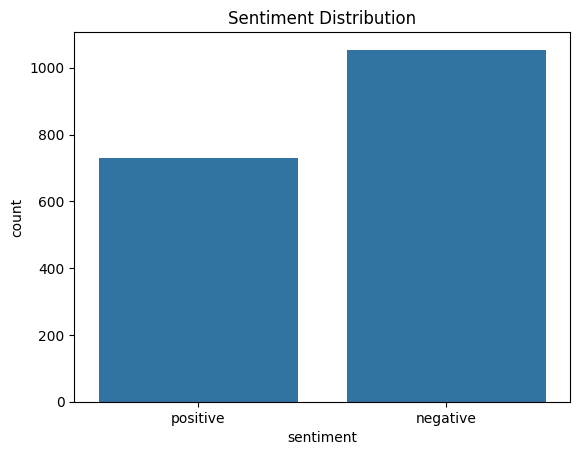

In [64]:
#Sentiment Distribution
sns.countplot(x='sentiment', data=dataframe)
plt.title('Sentiment Distribution')
plt.show()


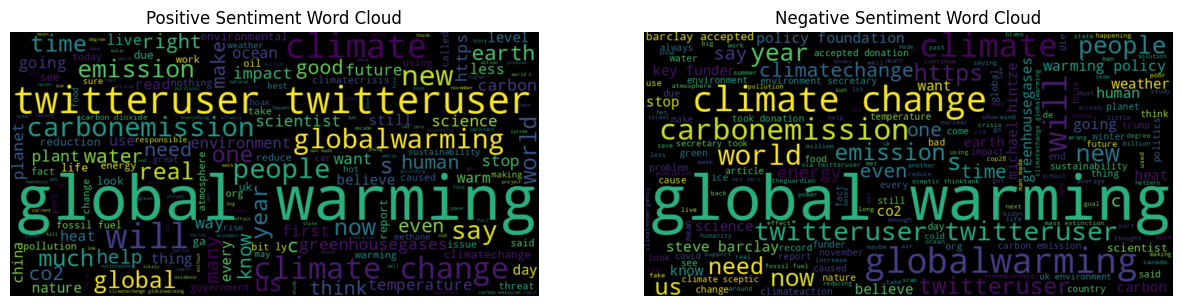

In [66]:
#Word Clouds
from wordcloud import WordCloud

pos_tweets = ' '.join(dataframe[dataframe['sentiment'] == 'positive']['Clean text'].astype(str))
neg_tweets = ' '.join(dataframe[dataframe['sentiment'] == 'negative']['Clean text'].astype(str))

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

wordcloud_pos = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(pos_tweets)
wordcloud_neg = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(neg_tweets)

axes[0].imshow(wordcloud_pos, interpolation="bilinear")
axes[0].set_title('Positive Sentiment Word Cloud')
axes[0].axis('off')

axes[1].imshow(wordcloud_neg, interpolation="bilinear")
axes[1].set_title('Negative Sentiment Word Cloud')
axes[1].axis('off')

plt.show()

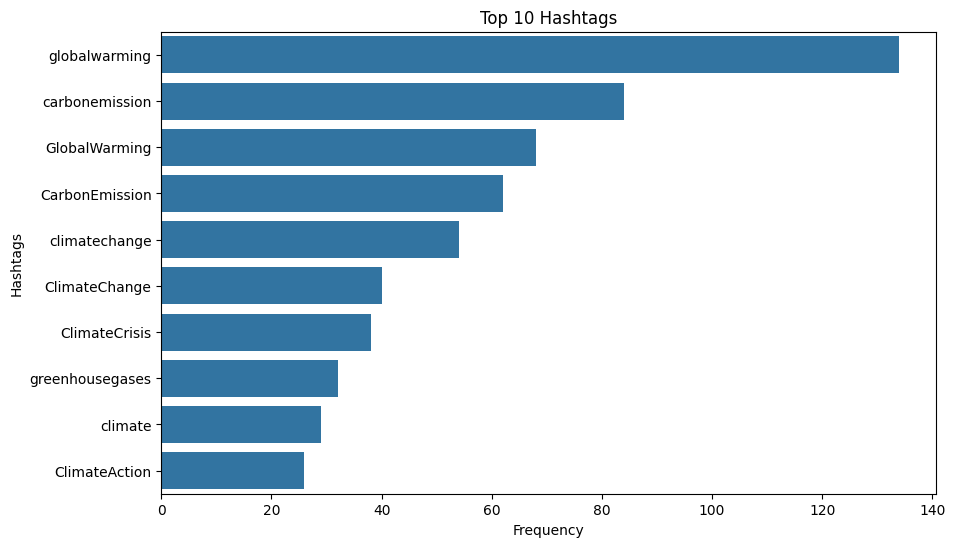

In [67]:
#Popular Hashtags
htags = dataframe['Post Body'].str.findall(r'#(\w+)').explode()
top_htags = htags.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_htags.values, y=top_htags.index)
plt.title('Top 10 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.show()

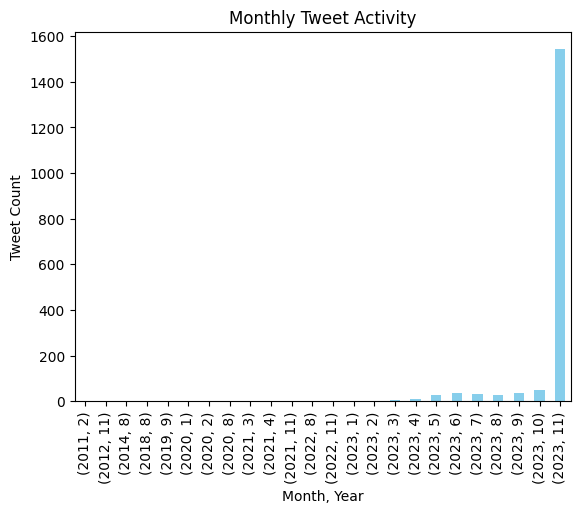

In [68]:
#Time Series Analysis
#Monthly tweet activity
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Timestamp' column is a string format, convert it to datetime
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'])

# Extract month and year and create new columns
dataframe['Month'] = dataframe['Timestamp'].dt.month
dataframe['Year'] = dataframe['Timestamp'].dt.year

# Count the number of tweets per month and year
monthly_activity = dataframe.groupby(['Year', 'Month']).size()

# Plot monthly activity
monthly_activity.plot(kind='bar', color='skyblue')
plt.xlabel('Month, Year')
plt.ylabel('Tweet Count')
plt.title('Monthly Tweet Activity')
plt.show()

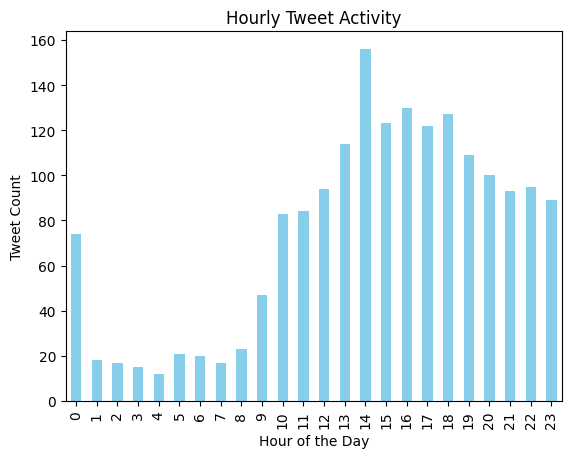

In [69]:
#Hourly tweet activity
# Assuming 'Timestamp' column is a string format, convert it to datetime
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'])

# Extract hour and create a new column
dataframe['Hour'] = dataframe['Timestamp'].dt.hour

# Count the number of tweets per hour
hourly_activity = dataframe.groupby('Hour').size()

# Plot hourly activity
hourly_activity.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.title('Hourly Tweet Activity')
plt.show()

In [71]:
columns_to_delete1 = [12,13,14]
dataframe.drop(dataframe.columns[columns_to_delete1], axis=1, inplace=True)
dataframe.head()

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text,sentiment,tweet_sentiment
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18 00:53:00+00:00,global warming,global warming is waiting for no one. surely w...,positive,1
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17 12:04:00+00:00,global warming,yet more confirmation that climate change is h...,positive,1
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14 16:35:00+00:00,global warming,"""there is increasing evidence that global warm...",positive,1
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17 14:23:00+00:00,global warming,"new investigation\n\nwe can reveal that, just...",positive,1
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17 21:15:00+00:00,global warming,environment secretary steve barclay received d...,negative,0


Tokenization



In [72]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [73]:
def tokenization(tweet):
  tokens = word_tokenize(tweet)
  return tokens

  #nltk.download('punkt')


In [74]:
dataframe['text tokens'] = dataframe['Clean text'].apply(tokenization)

In [75]:
dataframe.head()

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text,sentiment,tweet_sentiment,text tokens
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18 00:53:00+00:00,global warming,global warming is waiting for no one. surely w...,positive,1,"[global, warming, is, waiting, for, no, one, ...."
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17 12:04:00+00:00,global warming,yet more confirmation that climate change is h...,positive,1,"[yet, more, confirmation, that, climate, chang..."
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14 16:35:00+00:00,global warming,"""there is increasing evidence that global warm...",positive,1,"[``, there, is, increasing, evidence, that, gl..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17 14:23:00+00:00,global warming,"new investigation\n\nwe can reveal that, just...",positive,1,"[new, investigation, we, can, reveal, that, ,,..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17 21:15:00+00:00,global warming,environment secretary steve barclay received d...,negative,0,"[environment, secretary, steve, barclay, recei..."


In [76]:
import string

In [77]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [78]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'had', "haven't", 'yours', "she's", 'been', 'not', 'just', 'then', 'up', "you'd", 'o', 'of', 'its', 'through', 'during', 'here', 'now', 'won', 'doesn', 'there', 'ours', 've', 'having', 'were', 'once', 'do', 'again', 'haven', 'that', 'into', 'being', "mightn't", 're', 'under', 'few', 'their', 'myself', 'are', 'further', 'why', 'which', 'am', "don't", "mustn't", 'the', 'where', 'between', 'this', 'doing', 'has', 'no', "should've", 'how', 'hasn', 'll', "weren't", 'you', 'shan', "it's", 'in', "won't", 'who', 'out', "you're", 'below', 'hers', 't', 'yourselves', 'my', 'own', 'most', 'weren', 'wouldn', 'other', "shan't", 'or', 'very', 'does', 'them', "you'll", 'didn', 'before', 'shouldn', 'wasn', 'both', 'on', 'isn', 'whom', 'for', 'we', 'ain', 'after', 'him', 'what', 'and', 'will', "hasn't", 'an', 'at', 'but', 'your', 'over', 'hadn', 'it', "doesn't", 'a', "you've", 'any', 'about', 'they', 'was', 'against', 'to', "didn't", 'such', 'mustn', 'all', 'when', 'our', 'because', 'needn', 'only', "w

In [79]:
stop_words.discard('not')
print(stop_words)

{'had', "haven't", 'yours', "she's", 'been', 'just', 'then', 'up', "you'd", 'o', 'of', 'its', 'through', 'during', 'here', 'now', 'won', 'doesn', 'there', 'ours', 've', 'having', 'were', 'once', 'do', 'again', 'haven', 'that', 'into', 'being', "mightn't", 're', 'under', 'few', 'their', 'myself', 'are', 'further', 'why', 'which', 'am', "don't", "mustn't", 'the', 'where', 'between', 'this', 'doing', 'has', 'no', "should've", 'how', 'hasn', 'll', "weren't", 'you', 'shan', "it's", 'in', "won't", 'who', 'out', "you're", 'below', 'hers', 't', 'yourselves', 'my', 'own', 'most', 'weren', 'wouldn', 'other', "shan't", 'or', 'very', 'does', 'them', "you'll", 'didn', 'before', 'shouldn', 'wasn', 'both', 'on', 'isn', 'whom', 'for', 'we', 'ain', 'after', 'him', 'what', 'and', 'will', "hasn't", 'an', 'at', 'but', 'your', 'over', 'hadn', 'it', "doesn't", 'a', "you've", 'any', 'about', 'they', 'was', 'against', 'to', "didn't", 'such', 'mustn', 'all', 'when', 'our', 'because', 'needn', 'only', "wasn't",

In [80]:
def customize_tokenization(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [81]:
dataframe.head()

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text,sentiment,tweet_sentiment,text tokens
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18 00:53:00+00:00,global warming,global warming is waiting for no one. surely w...,positive,1,"[global, warming, is, waiting, for, no, one, ...."
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17 12:04:00+00:00,global warming,yet more confirmation that climate change is h...,positive,1,"[yet, more, confirmation, that, climate, chang..."
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14 16:35:00+00:00,global warming,"""there is increasing evidence that global warm...",positive,1,"[``, there, is, increasing, evidence, that, gl..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17 14:23:00+00:00,global warming,"new investigation\n\nwe can reveal that, just...",positive,1,"[new, investigation, we, can, reveal, that, ,,..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17 21:15:00+00:00,global warming,environment secretary steve barclay received d...,negative,0,"[environment, secretary, steve, barclay, recei..."


In [82]:
dataframe['text tokens'] = dataframe['Clean text'].apply(customize_tokenization)

In [83]:
dataframe.head(10)

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text,sentiment,tweet_sentiment,text tokens
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18 00:53:00+00:00,global warming,global warming is waiting for no one. surely w...,positive,1,"[global, warming, waiting, one, surely, nature..."
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17 12:04:00+00:00,global warming,yet more confirmation that climate change is h...,positive,1,"[yet, confirmation, climate, change, impact, g..."
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14 16:35:00+00:00,global warming,"""there is increasing evidence that global warm...",positive,1,"[increasing, evidence, global, warming, accele..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17 14:23:00+00:00,global warming,"new investigation\n\nwe can reveal that, just...",positive,1,"[new, investigation, reveal, appointed, enviro..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17 21:15:00+00:00,global warming,environment secretary steve barclay received d...,negative,0,"[environment, secretary, steve, barclay, recei..."
5,Asha Fassbender,@FassbenderENG,0.0,0.0,https://twitter.com/FassbenderENG/status/17256...,https://twitter.com//FassbenderENG,IREDA IPO: “We Are India’s Largest Pure-Play G...,2023-11-18 00:55:00+00:00,global warming,ireda ipo: “we are india’s largest pure-play g...,positive,1,"[ireda, ipo, india, largest, green, financing,..."
6,Trevor Randall,@Revs77,0.0,0.0,https://twitter.com/Revs77/status/172567817942...,https://twitter.com//Revs77,Here's the armchair expert who has solved glob...,2023-11-18 00:51:00+00:00,global warming,here is the armchair expert who has solved glo...,positive,1,"[armchair, expert, solved, global, warming, pr..."
7,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256781590...,https://twitter.com//jitin84,Reason behind global warming,2023-11-18 00:51:00+00:00,global warming,reason behind global warming,negative,0,"[reason, behind, global, warming]"
8,TopGfollower3,@TopGfollower3,0.0,0.0,https://twitter.com/TopGfollower3/status/17256...,https://twitter.com//TopGfollower3,But I thought it was white supremacy. Wait no ...,2023-11-18 00:51:00+00:00,global warming,but i thought it was white supremacy. wait no ...,negative,0,"[thought, white, supremacy, wait, global, warm..."
9,Jitin Sharma,@jitin84,0.0,0.0,https://twitter.com/jitin84/status/17256785176...,https://twitter.com//jitin84,Reason for global warming,2023-11-18 00:53:00+00:00,global warming,reason for global warming,negative,0,"[reason, global, warming]"


Stemming



In [84]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

In [85]:
def token_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [86]:
dataframe['Stemmed Tokens'] = dataframe['text tokens'].apply(token_stemming)

In [87]:
dataframe['Stemmed Tokens']

0       [global, warm, wait, one, sure, natur, everyon...
1       [yet, confirm, climat, chang, impact, global, ...
2       [increas, evid, global, warm, acceler, past, y...
3       [new, investig, reveal, appoint, environ, secr...
4       [environ, secretari, steve, barclay, receiv, d...
                              ...                        
1778    [solv, world, carbon, emiss, energi, problem, ...
1779    [twitterus, twitterus, join, forc, provid, sol...
1780    [air, pollut, hidden, killer, alarm, global, i...
1781    [everi, choic, make, type, car, drive, product...
1782    [celebr, world, telecommun, inform, societi, d...
Name: Stemmed Tokens, Length: 1783, dtype: object

In [88]:
dataframe.head()

,Name,Handle,Retweets,Likes,Tweet URL,Profile Link,Post Body,Timestamp,searchQuery,Clean text,sentiment,tweet_sentiment,text tokens,Stemmed Tokens
0,Ernest Markham,@ErnMarkham,0.0,0.0,https://twitter.com/ErnMarkham/status/17256786...,https://twitter.com//ErnMarkham,GLOBAL WARMING is waiting for no one. Surely w...,2023-11-18 00:53:00+00:00,global warming,global warming is waiting for no one. surely w...,positive,1,"[global, warming, waiting, one, surely, nature...","[global, warm, wait, one, sure, natur, everyon..."
1,Jonathan Overpeck,@GreatLakesPeck,37.0,83.0,https://twitter.com/GreatLakesPeck/status/1725...,https://twitter.com//GreatLakesPeck,Yet more confirmation that climate change is h...,2023-11-17 12:04:00+00:00,global warming,yet more confirmation that climate change is h...,positive,1,"[yet, confirmation, climate, change, impact, g...","[yet, confirm, climat, chang, impact, global, ..."
2,∞ Vishy ∞,@VishalManve12,1.0,0.0,https://twitter.com/VishalManve12/status/17132...,https://twitter.com//VishalManve12,"""There is increasing evidence that global warm...",2023-10-14 16:35:00+00:00,global warming,"""there is increasing evidence that global warm...",positive,1,"[increasing, evidence, global, warming, accele...","[increas, evid, global, warm, acceler, past, y..."
3,Good Law Project,@GoodLawProject,1182.0,1735.0,https://twitter.com/GoodLawProject/status/1725...,https://twitter.com//GoodLawProject,"NEW INVESTIGATION\n\nWe can reveal that, just...",2023-11-17 14:23:00+00:00,global warming,"new investigation\n\nwe can reveal that, just...",positive,1,"[new, investigation, reveal, appointed, enviro...","[new, investig, reveal, appoint, environ, secr..."
4,Prem Sikka,@premnsikka,131.0,173.0,https://twitter.com/premnsikka/status/17256237...,https://twitter.com//premnsikka,Environment secretary Steve Barclay received d...,2023-11-17 21:15:00+00:00,global warming,environment secretary steve barclay received d...,negative,0,"[environment, secretary, steve, barclay, recei...","[environ, secretari, steve, barclay, receiv, d..."


Text Representation

Processing Tweets

In [89]:
X = dataframe["Stemmed Tokens"].tolist()
y = dataframe["tweet_sentiment"].tolist()

In [90]:
print(X)
print(y)

[['global', 'warm', 'wait', 'one', 'sure', 'natur', 'everyon', 'wake', 'especi', 'politician'], ['yet', 'confirm', 'climat', 'chang', 'impact', 'global', 'warm', 'put', 'increas', 'energi', 'atmospher', 'result', 'stronger', 'storm', 'intensifi', 'wind', 'gener', 'increas', 'wave', 'height'], ['increas', 'evid', 'global', 'warm', 'acceler', 'past', 'year', 'rather', 'continu', 'gradual', 'steadi', 'pace', 'absolut', 'gobsmack', 'piec', 'twitterus'], ['new', 'investig', 'reveal', 'appoint', 'environ', 'secretari', 'steve', 'barclay', 'accept', 'donat', 'conserv', 'parti', 'peer', 'fund', 'global', 'warm', 'polici', 'foundat', 'read', 'full', 'stori'], ['environ', 'secretari', 'steve', 'barclay', 'receiv', 'donat', 'major', 'funder', 'global', 'warm', 'polici', 'foundat', 'climat', 'chang', 'denial', 'week', 'take', 'role', 'donor', 'get', 'return', 'invest', 'law', 'lax', 'law', 'poor', 'enforc'], ['ireda', 'ipo', 'india', 'largest', 'green', 'financ', 'entiti', 'say', 'chairman', 'prad

1. Positive/Negative Frequency

In [91]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [92]:
freqs_all = build_freqs(X, y)

In-case of new tweet, we use this func to calculate the freq [2D vector]

In [93]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

2. Bag of Word



In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [96]:
cv_vect = fit_cv(X)

In [98]:
cv_vect

CountVectorizer(preprocessor=<function fit_cv.<locals>.<lambda> at 0x7abbd76ac1f0>,
                tokenizer=<function fit_cv.<locals>.<lambda> at 0x7abbd76ac8b0>)

In [99]:
ft = cv_vect.get_feature_names_out()

In [100]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)


There are 5792 features in this corpus
['aan' 'aandacht' 'aardvark' ... '当时拉登发的是个音频' '気候正義' '環境破壊']


In [101]:
cv_mtx = cv_vect.transform(X)

In [102]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (1783, 5792)


In [103]:
cv_mtx.toarray()[:10, :10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

3. Term Frequency – Inverse Document Frequency (TF-IDF)

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [106]:
tf_vect = fit_tfidf(X)
tf_mtx = tf_vect.transform(X)

In [107]:
ft1 = tf_vect.get_feature_names_out()

In [108]:
print("There are {} features in this corpus".format(len(ft)))
print(ft1)

There are 5792 features in this corpus
['aan' 'aandacht' 'aardvark' ... '当时拉登发的是个音频' '気候正義' '環境破壊']


In [109]:
print(tf_mtx.shape)

(1783, 5792)


In [110]:
print(tf_mtx.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
#print(tf_mtx.toarray()[:10, :10])
ft1[10:50]

array(['abroad', 'abruptli', 'absolut', 'absorb', 'abstract', 'absurd',
       'abus', 'abuzz', 'abyss', 'ac', 'academ', 'academi', 'acapulco',
       'acc', 'acceler', 'accept', 'access', 'accet', 'accomplish',
       'accord', 'accordingli', 'account', 'accru', 'accur', 'accuweath',
       'achiev', 'acho', 'acid', 'acidif', 'acknowledg', 'acontec',
       'acontecendo', 'across', 'act', 'action', 'activ', 'activist',
       'activistisch', 'actnow', 'actual'], dtype=object)

In [112]:
#eg tweet
new_tweet = [["aan", "accord", "acknowledg"]]
tf_vect.transform(new_tweet).toarray()

array([[0.60671415, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Sentiment Model

In [113]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

Train/Test Split

In [114]:
print(X)
print(y)

[['global', 'warm', 'wait', 'one', 'sure', 'natur', 'everyon', 'wake', 'especi', 'politician'], ['yet', 'confirm', 'climat', 'chang', 'impact', 'global', 'warm', 'put', 'increas', 'energi', 'atmospher', 'result', 'stronger', 'storm', 'intensifi', 'wind', 'gener', 'increas', 'wave', 'height'], ['increas', 'evid', 'global', 'warm', 'acceler', 'past', 'year', 'rather', 'continu', 'gradual', 'steadi', 'pace', 'absolut', 'gobsmack', 'piec', 'twitterus'], ['new', 'investig', 'reveal', 'appoint', 'environ', 'secretari', 'steve', 'barclay', 'accept', 'donat', 'conserv', 'parti', 'peer', 'fund', 'global', 'warm', 'polici', 'foundat', 'read', 'full', 'stori'], ['environ', 'secretari', 'steve', 'barclay', 'receiv', 'donat', 'major', 'funder', 'global', 'warm', 'polici', 'foundat', 'climat', 'chang', 'denial', 'week', 'take', 'role', 'donor', 'get', 'return', 'invest', 'law', 'lax', 'law', 'poor', 'enforc'], ['ireda', 'ipo', 'india', 'largest', 'green', 'financ', 'entiti', 'say', 'chairman', 'prad

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/(len(X_train)+len(X_test))))

Size of X_train: 1426
Size of y_train: 1426


Size of X_test: 357
Size of y_test: 357


Train proportion: 80%


In [117]:
import random

In [118]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['scientist', 'busi', 'set', 'fun', 'interact', 'way', 'teach', 'tippingpoint', 'greenhousegas', 'methan', 'brighton', 'unitarian', 'church', 'pm', 'sat', 'march']
Sentiment: 1


Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

Pos/Neg Frequency

In [121]:
freqs = build_freqs(X_train, y_train)
Xtrain_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
Xtest_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]


In [122]:
model_pn = fit_lr(Xtrain_pn, y_train)
print(model_pn.coef_, model_pn.intercept_)

[[ 0.00975894 -0.0070852 ]] [-1.06179405]


Count Vector

In [123]:
cv = fit_cv(X_train)
Xtrain_cv = cv.transform(X_train)
Xtest_cv = cv.transform(X_test)

In [124]:
model_cv = fit_lr(Xtrain_cv, y_train)

TF-IDF

In [125]:
tf = fit_tfidf(X_train)
Xtrain_tf = tf.transform(X_train)
Xtest_tf = tf.transform(X_test)

In [126]:
model_tf = fit_lr(Xtrain_tf, y_train)

Performance Matrix

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Positive/Negative Frequencies

In [128]:
y_pred_pn = model_pn.predict(Xtest_pn)

In [129]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_pn)))

LR Model Accuracy: 64.15%


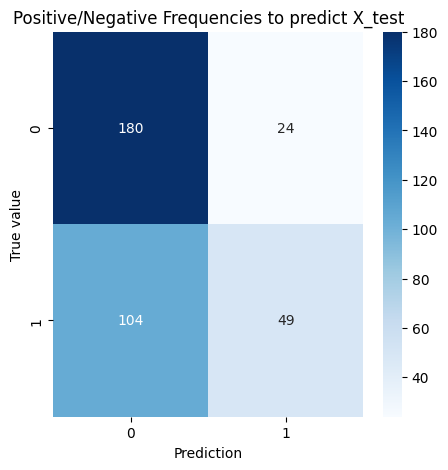

In [130]:
import matplotlib.pyplot as plt

title = "Positive/Negative Frequencies to predict X_test"
plot_confusion(confusion_matrix(y_test, y_pred_pn))
plt.title(title)
plt.show()

Count Vector

In [131]:
y_pred_cv = model_cv.predict(Xtest_cv)

In [132]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_cv)))

LR Model Accuracy: 73.11%


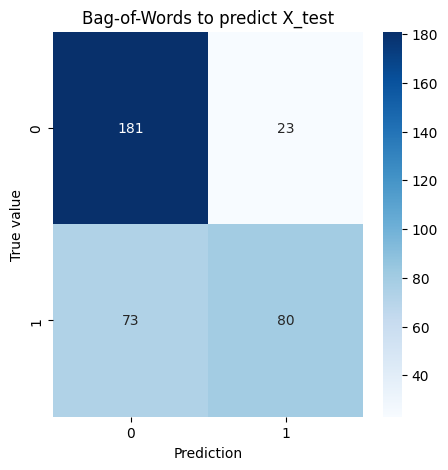

In [133]:
title = "Bag-of-Words to predict X_test"
disp=plot_confusion(confusion_matrix(y_test, y_pred_cv))
plt.title(title)
plt.show()

TF-IDF

In [134]:
y_pred_tf = model_tf.predict(Xtest_tf)

In [135]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_tf)))

LR Model Accuracy: 69.47%


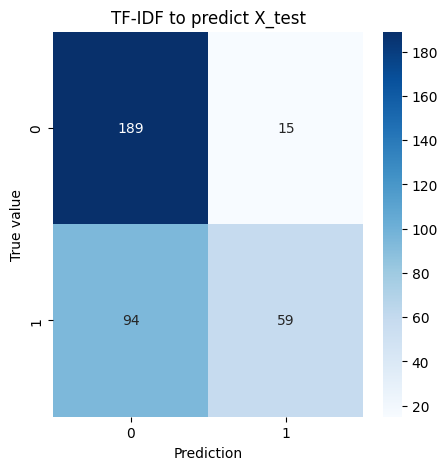

In [136]:
title = "TF-IDF to predict X_test"
plot_confusion(confusion_matrix(y_test, y_pred_tf))
plt.title(title)
plt.show()

Create a process_tweet() to call all the text normalization function, while checking predections with new tweets

In [158]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_rt(tweet) # replace retweet
  tweet = user_replace(tweet, "") # replace user tag
  tweet = url_replace(tweet) # replace url
  tweet = hashtag_replace(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lower(tweet) # lower case
  tweet = word_contractions(tweet) # replace contractions
  tweet = punc_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = delemoji(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = customize_tokenization(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = token_stemming(tokens) # stem tokens

  return stem

Mini-Pipeline

Use a new tweet to check if the model works as well as expected

In [162]:
tweet_to_predict="""@OmonukN
#Climatechange disproportionately affects women in Africa in various ways.
We need #ClimateActionNow!
#ClimateJusticeNow #ClimateStrike #ClimateEmergency"""

In [163]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [164]:
predict_tweet(tweet_to_predict)

'Prediction is negative sentiment'